In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
len(df['Customer_name'].unique())

5901

In [5]:
df.drop(['Product_id','instock_date','Customer_name'],axis=1,inplace=True)
test.drop(['Product_id','instock_date','Customer_name'],axis=1,inplace=True)

In [6]:
df

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,21.0,55,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,36.0,358,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,27.0,452,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [7]:
df.isnull().sum()

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [8]:
df['Stall_no'].fillna(20.0,inplace=True)
test['Stall_no'].fillna(20.0,inplace=True)

In [9]:
df['Stall_no'].unique()

array([37., 38.,  9., 50.,  7., 23., 33.,  4., 26.,  5., 16.,  1., 39.,
       45., 46., 15., 14., 17., 36., 24., 10., 27., 40., 18., 32., 19.,
       25., 35., 29.,  8., 21.,  3., 42., 41., 30., 28., 43., 20., 31.,
        2., 49., 22., 12., 13., 34., 11., 47.,  6., 48., 44.])

In [10]:
df.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [11]:
df['Selling_Price']=np.where(df['Selling_Price']<0,-1*df['Selling_Price'],df['Selling_Price'])

In [12]:
df.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [13]:
df['Discount_avail'].unique()

array([ 0.,  1., nan])

In [14]:
df['Discount_avail_null']=np.where(df['Discount_avail'].isnull(),1,0)
test['Discount_avail_null']=np.where(test['Discount_avail'].isnull(),1,0)

In [15]:
for i in range(len(df)):
    if(np.isnan(df['Discount_avail'][i])):
        if(df['Selling_Price'][i]<3000):
            df['Discount_avail'][i]=1.0
        else:
            df['Discount_avail'][i]=0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
df['Discount_avail'].unique()

array([0., 1.])

In [17]:
df.isnull().sum()

Stall_no                 0
Market_Category          0
Loyalty_customer         0
Product_Category         0
Grade                    0
Demand                   0
Discount_avail           0
charges_1              198
charges_2 (%)          205
Minimum_price           38
Maximum_price          343
Selling_Price           41
Discount_avail_null      0
dtype: int64

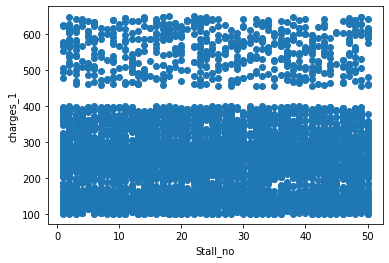

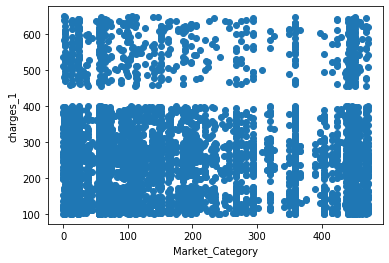

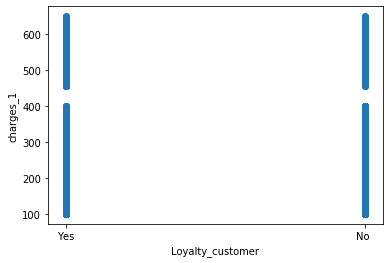

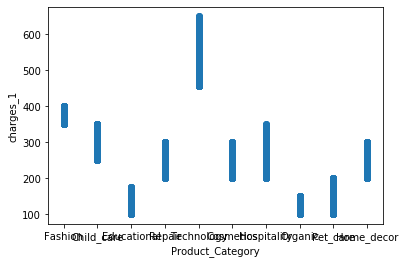

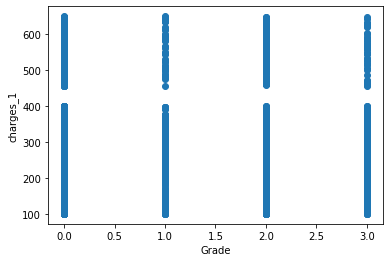

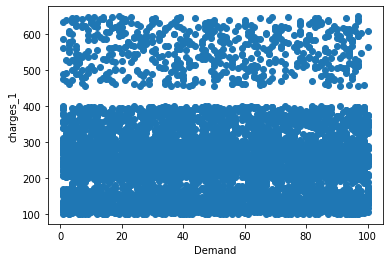

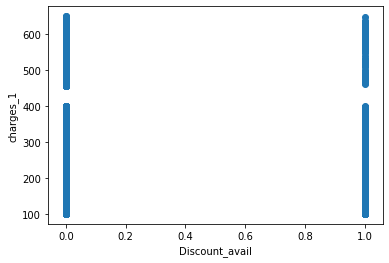

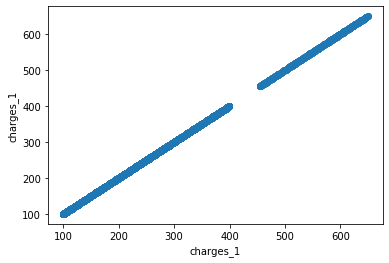

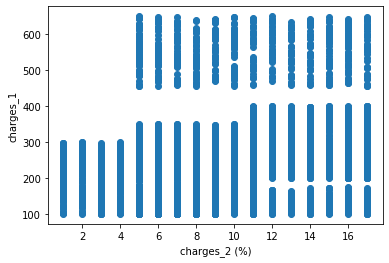

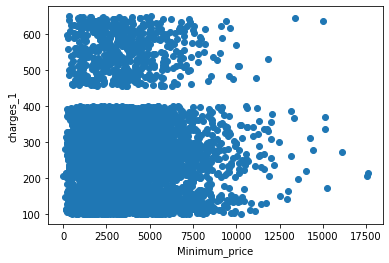

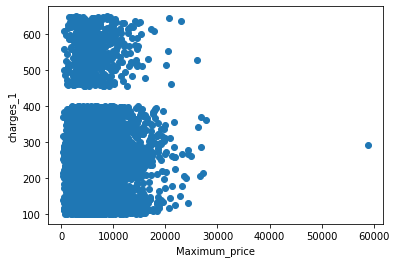

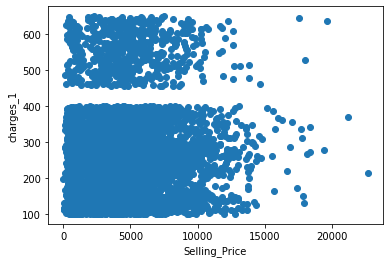

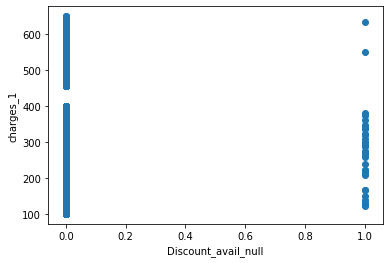

In [18]:
for i in df.columns:
    plt.scatter(df[i],df['charges_1'])
    plt.xlabel(i)
    plt.ylabel('charges_1')
    plt.show()

In [19]:
df['charges_1_null'] = np.where(df['charges_1'].isnull(),1,0)
test['charges_1_null'] = np.where(test['charges_1'].isnull(),1,0)

In [20]:
dftemp = df.groupby('Product_Category').mean()['charges_1']

In [21]:
dftemp

Product_Category
Child_care     298.682813
Cosmetics      248.925984
Educational    135.969646
Fashion        374.436960
Home_decor     250.855442
Hospitality    274.778689
Organic        124.662273
Pet_care       150.343328
Repair         247.748851
Technology     556.105351
Name: charges_1, dtype: float64

In [22]:
for i in range(len(df)):
    if(np.isnan(df['charges_1'][i])):
        df['charges_1'][i]=dftemp[df['Product_Category'][i]]

for i in range(len(test)):
    if(np.isnan(test['charges_1'][i])):
        test['charges_1'][i]=dftemp[test['Product_Category'][i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
df.isnull().sum()

Stall_no                 0
Market_Category          0
Loyalty_customer         0
Product_Category         0
Grade                    0
Demand                   0
Discount_avail           0
charges_1                0
charges_2 (%)          205
Minimum_price           38
Maximum_price          343
Selling_Price           41
Discount_avail_null      0
charges_1_null           0
dtype: int64

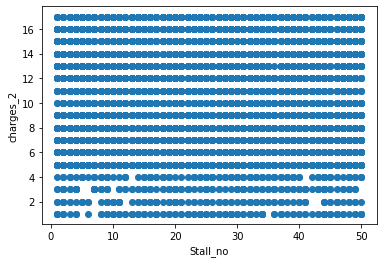

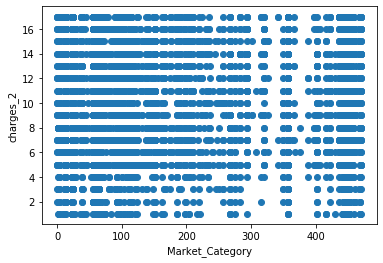

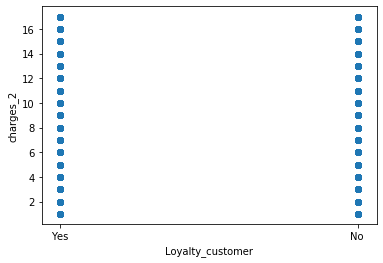

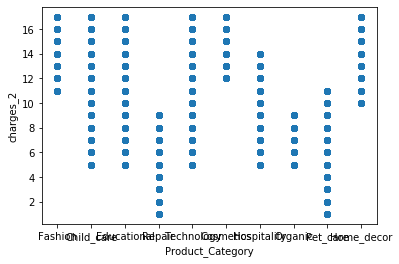

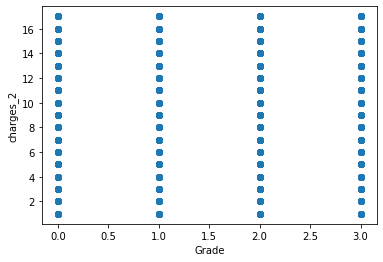

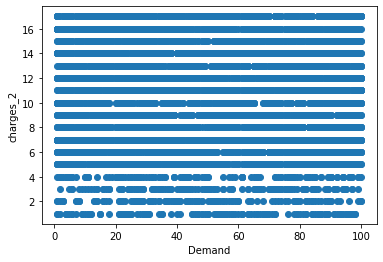

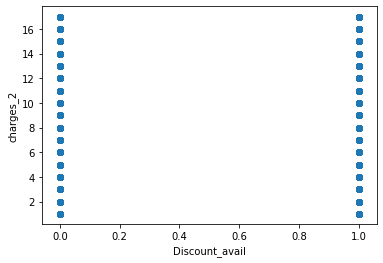

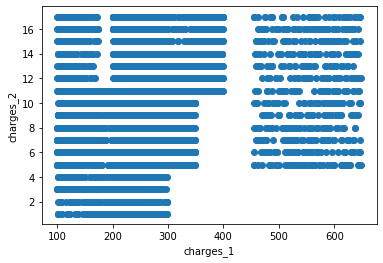

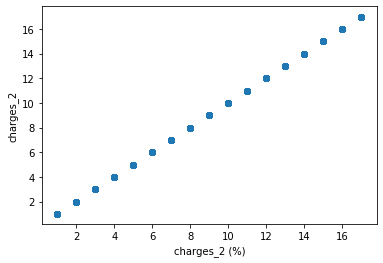

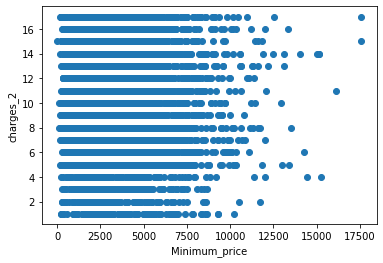

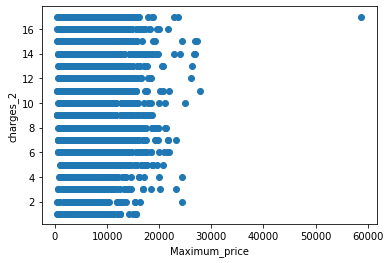

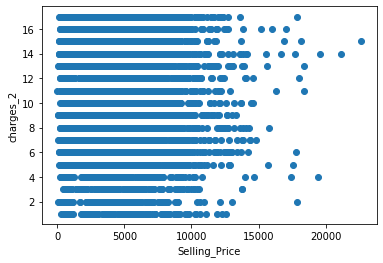

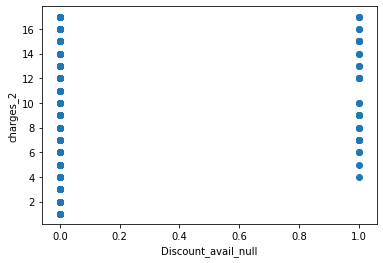

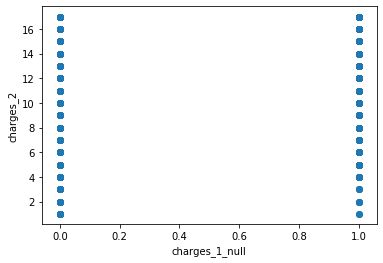

In [24]:
for i in df.columns:
    plt.scatter(df[i],df['charges_2 (%)'])
    plt.xlabel(i)
    plt.ylabel('charges_2')
    plt.show()

In [25]:
df['charges_2 (%)_null']=np.where(df['charges_2 (%)'].isnull(),1,0)
test['charges_2 (%)_null']=np.where(test['charges_2 (%)'].isnull(),1,0)

In [26]:
dftemp = df.groupby('Product_Category').mean()['charges_2 (%)']
dftemp

Product_Category
Child_care     10.938871
Cosmetics      14.669342
Educational    10.877104
Fashion        13.822222
Home_decor     13.531092
Hospitality     9.399015
Organic         6.971524
Pet_care        6.054545
Repair          4.989280
Technology     10.960591
Name: charges_2 (%), dtype: float64

In [27]:
for i in range(len(df)):
    if(np.isnan(df['charges_2 (%)'][i])):
        df['charges_2 (%)'][i]=dftemp[df['Product_Category'][i]]
for i in range(len(test)):
    if(np.isnan(test['charges_2 (%)'][i])):
        test['charges_2 (%)'][i]=dftemp[test['Product_Category'][i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df.isnull().sum()

Stall_no                 0
Market_Category          0
Loyalty_customer         0
Product_Category         0
Grade                    0
Demand                   0
Discount_avail           0
charges_1                0
charges_2 (%)            0
Minimum_price           38
Maximum_price          343
Selling_Price           41
Discount_avail_null      0
charges_1_null           0
charges_2 (%)_null       0
dtype: int64

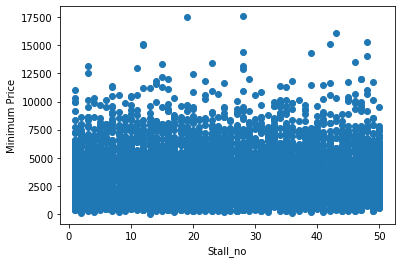

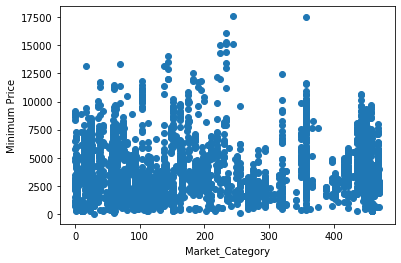

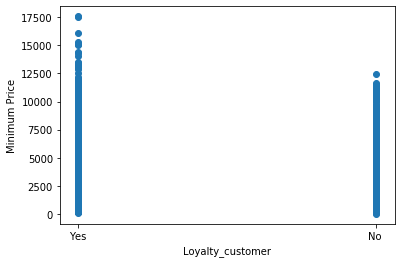

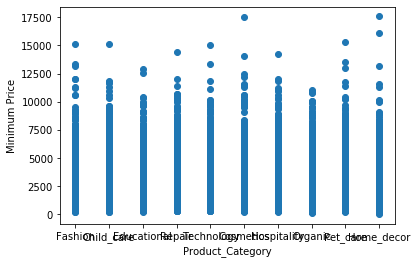

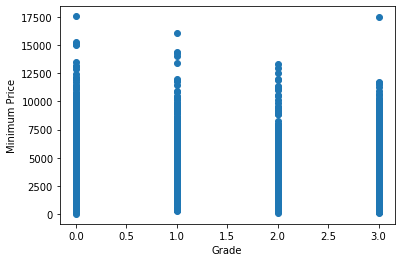

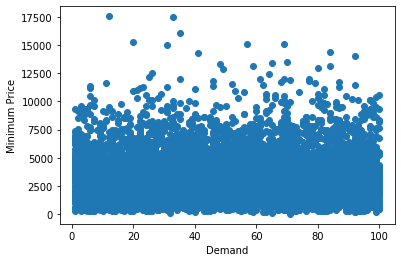

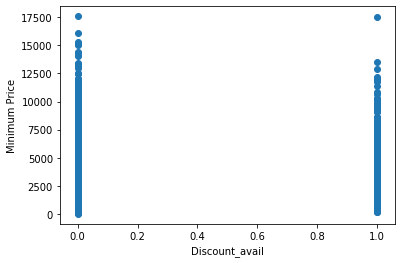

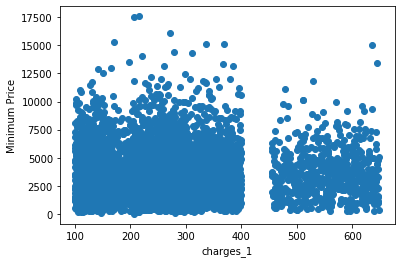

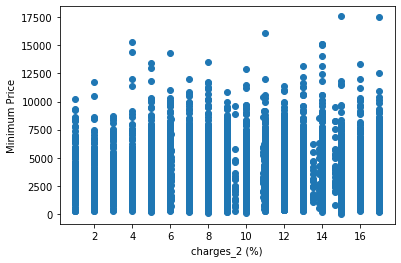

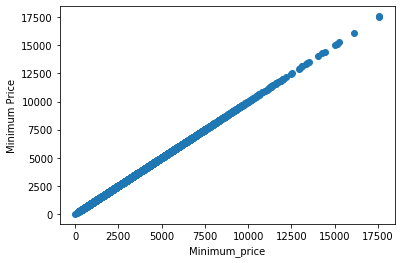

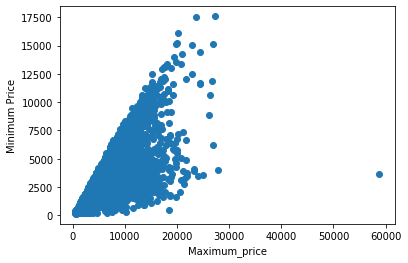

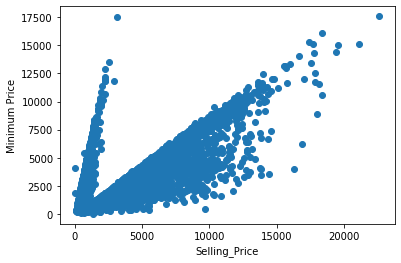

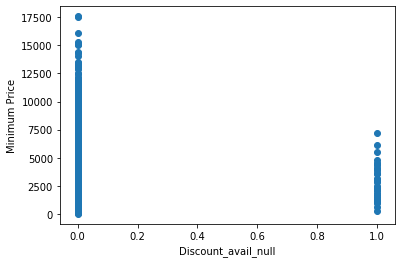

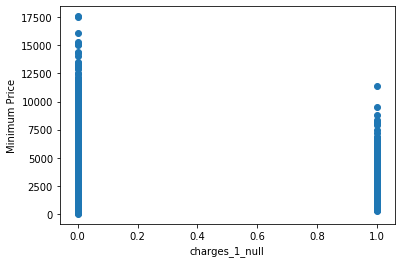

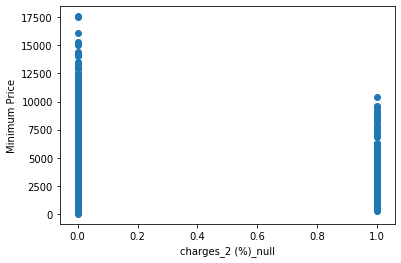

In [29]:
for i in df.columns:
    plt.scatter(df[i],df['Minimum_price'])
    plt.xlabel(i)
    plt.ylabel('Minimum Price')
    plt.show()

In [30]:
df['Minimum_price_null']=np.where(df['Minimum_price'].isnull(),1,0)
test['Minimum_price_null']=np.where(test['Minimum_price'].isnull(),1,0)
df['Maximum_price_null']=np.where(df['Maximum_price'].isnull(),1,0)
test['Maximum_price_null']=np.where(test['Maximum_price'].isnull(),1,0)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
X=df.copy()
X.dropna(inplace=True)

In [33]:
y=X['Minimum_price']
X=X['Maximum_price']
X = pd.DataFrame(X)
X

,Maximum_price
0,4713.0
1,10352.0
2,7309.0
3,20814.0
4,9261.0
...,...
6363,11266.0
6364,4920.0
6365,14614.0
6366,5849.0


In [34]:
lr.fit(X,y)

LinearRegression()

In [35]:
for i in range(len(df)):
    if np.isnan(df['Minimum_price'][i]):
        if(np.isnan(df['Maximum_price'][i])):
            df['Minimum_price'][i]=df['Minimum_price'].mean()
            continue
        t1 = []
        t1.append(df['Maximum_price'][i])
        t1 = np.reshape(t1,(-1,1))
        df['Minimum_price'][i]=lr.predict(t1)
for i in range(len(test)):
    if np.isnan(test['Minimum_price'][i]):
        if(np.isnan(test['Maximum_price'][i])):
            test['Minimum_price'][i]=df['Minimum_price'].mean()
            continue
        t1 = []
        t1.append(test['Maximum_price'][i])
        t1 = np.reshape(t1,(-1,1))
        test['Minimum_price'][i]=lr.predict(t1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value i

In [36]:
X=df.copy()
X.dropna(inplace=True)

In [37]:
y=X['Maximum_price']
X=X['Minimum_price']
X = pd.DataFrame(X)
X

,Minimum_price
0,2983.0
1,7495.0
2,5752.0
3,5090.0
4,2430.0
...,...
6363,8174.0
6364,3564.0
6365,5303.0
6366,4334.0


In [38]:
lr.fit(X,y)

LinearRegression()

In [39]:
for i in range(len(df)):
    if np.isnan(df['Maximum_price'][i]):
        t1 = []
        t1.append(df['Minimum_price'][i])
        t1 = np.reshape(t1,(-1,1))
        df['Maximum_price'][i]=lr.predict(t1)
for i in range(len(test)):
    if np.isnan(test['Maximum_price'][i]):
        t1 = []
        t1.append(test['Minimum_price'][i])
        t1 = np.reshape(t1,(-1,1))
        test['Maximum_price'][i]=lr.predict(t1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A va

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A va

In [40]:
df.dropna(inplace=True)

In [41]:
df

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Discount_avail_null,charges_1_null,charges_2 (%)_null,Minimum_price_null,Maximum_price_null
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,0,0,0,0,0
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,0,0,0,0,0
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,0,0,0,0,0
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,0,0,0,0,0
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192,0,0,0,0,0
6364,21.0,55,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200,0,0,0,0,0
6365,36.0,358,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775,0,0,0,0,0
6366,27.0,452,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997,0,0,0,0,0


In [42]:
test

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Discount_avail_null,charges_1_null,charges_2 (%)_null,Minimum_price_null,Maximum_price_null
0,39.0,205,No,Fashion,0,90,0,380.0,16.0,2576.0,3340,0,0,0,0,0
1,49.0,3,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955,0,0,0,0,0
2,1.0,183,No,Technology,2,55,0,493.0,9.0,7175.0,15715,0,0,0,0,0
3,8.0,358,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078,0,0,0,0,0
4,33.0,167,No,Technology,0,27,0,567.0,16.0,4069.0,6244,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,9.0,58,Yes,Pet_care,0,39,0,117.0,5.0,3094.0,4674,0,0,0,0,0
3426,30.0,358,Yes,Technology,3,17,0,509.0,6.0,3384.0,14105,0,0,0,0,0
3427,14.0,106,Yes,Educational,0,36,0,150.0,17.0,710.0,10894,0,0,0,0,0
3428,1.0,104,Yes,Child_care,0,63,0,325.0,15.0,1477.0,5165,0,0,0,0,0


In [43]:
test.isnull().sum()

Stall_no               0
Market_Category        0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Discount_avail_null    0
charges_1_null         0
charges_2 (%)_null     0
Minimum_price_null     0
Maximum_price_null     0
dtype: int64

In [44]:
df.isnull().sum()

Stall_no               0
Market_Category        0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price          0
Discount_avail_null    0
charges_1_null         0
charges_2 (%)_null     0
Minimum_price_null     0
Maximum_price_null     0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
encoder = LabelEncoder()

In [47]:
df['Loyalty_customer'] = encoder.fit_transform(df['Loyalty_customer'])
df['Product_Category'] = encoder.fit_transform(df['Product_Category'])

In [48]:
test['Loyalty_customer'] = encoder.fit_transform(test['Loyalty_customer'])
test['Product_Category'] = encoder.fit_transform(test['Product_Category'])

In [49]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [50]:
X

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Discount_avail_null,charges_1_null,charges_2 (%)_null,Minimum_price_null,Maximum_price_null
0,37.0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,0,0,0,0,0
1,38.0,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,0,0,0,0,0
2,9.0,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,0,0,0,0,0
3,50.0,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,0,0,0,0,0
4,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,1,9,0,47,0.0,614.0,10.0,8174.0,11266.0,0,0,0,0,0
6364,21.0,55,1,0,0,35,0.0,269.0,5.0,3564.0,4920.0,0,0,0,0,0
6365,36.0,358,0,8,3,29,0.0,283.0,3.0,5303.0,14614.0,0,0,0,0,0
6366,27.0,452,1,8,0,8,0.0,267.0,3.0,4334.0,5849.0,0,0,0,0,0


In [51]:
y

0        4185.947700
1        9271.490256
2        6785.701362
3       13028.917824
4         906.553935
            ...     
6363    10277.520192
6364     4501.837200
6365    10218.878775
6366     5359.493997
6367     5220.013568
Name: Selling_Price, Length: 6327, dtype: float64

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
n_estimators = [116,118,119,120]
max_depth = [10,11,12,13]
min_samples_split = [2,3,5]
min_samples_leaf = [1, 2, 3] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [55]:
rf_rand = RandomizedSearchCV(rf,hyperF,n_iter=10,cv=5,verbose=1)

In [56]:
rf_rand.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 11, 12, 13],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [116, 118, 119, 120]},
                   verbose=1)

In [57]:
pred = rf_rand.predict(X)

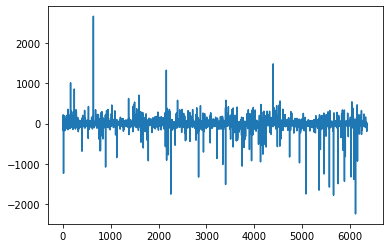

In [58]:
plt.plot(pred-y)

In [59]:
pred2 = rf_rand.predict(test)

In [60]:
test2 = pd.read_csv('test.csv',usecols=['Product_id'])

In [61]:
test2['Selling_Price']=pred2

In [62]:
test2.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3254.091084
1,ACCEGCATKHNRXUHW,1929.680892
2,NKCE6GJ5XVJDXNNZ,11766.891292
3,NKCEB8BK3ZXDHDHM,9375.082105
4,TOPEFDXSAHRNPF94,5594.011219


In [63]:
test2.to_csv('finalsub.csv',index=False)

In [64]:
rf_rand.best_params_

{'n_estimators': 120,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 13}